# **Auction Hunters**
## Exploratory Data Analysis Project
## Part 2: Exploratory Data Analysis
#### Joshua Higgins | October 2023 ~

## ❓ Check Part 1 - Data Pre-processing❓
* If you didn't see how I got here, check out the link below to the data collection, cleaning and verification (pre-processing) notebook. [Part 1: Pre-processing!](https://github.com/Joshua-Higgins-jp/Auction_Hunters_EDA/blob/master/auction_hunters_preprocessing.ipynb)

## Objectives
* Import the cleaned data.
* Perform an EDA on the data.
   * Answer Questions with data and get insights into the show.
* **BONUS!?** Rating prediction based on financial data? Sentiment Analysis?

## Questions

#### Financial Analysis
* 1.1. What are the best and worst performing episodes per season (Paid, Sold, Profit)?
* 1.2. What are the 3 best and worst performing episodes over the entire series (Paid, Sold, Profit)?
* 1.3. What is the profit margin per episode? Top 3? Season?
* 1.4. What is the return on investment per episode? Season?
* 1.5. What is the relative Paid, Sold, Profit normalised for number of episodes per season?
   * Season and Series Averages
* 1.6. What is the rank of best performing seasons using the relative Paid, Sold and Profit?

#### Location Analysis
* 2.1. How many times did Allen and Ton visit each state per season?
* 2.2. How many times did Allen and Ton visit each state in the entire series?
* 2.3. Which state has the best profit margin?
* 2.4. Which state has the best return on investment?

#### Time Analysis
* 3.1. How has paid, sold and profit trended with time (season 1 to season 5)?
* 3.2. When were the peak profit and peak profit margin metrics attained?
* 3.3. How were paid, sold, profit, ROI and Profit Margins affected by year?
* 3.4. How were paid, sold, profit, ROI and Profit Margins affected by season?

#### Rating Analysis
* 4.1. What is the best episode per season?
* 4.2. What is the worst episode per season?
* 4.3. What are the top 5 episodes of the series?
* 4.4. What are the worst 5 episodes of the series?
* 4.5. What's the difference between the IMDB rating data and the Trakt rating data?
* 4.6. Is there any correlation between rating and filming location?

#### Data Science
* 5.1. NLP: Is there a relationship between episode description sentiment and viewer rating?
* 5.2. NLP: Is there a relationship between episode description sentiment and financial metrics?
* 5.3. Is there a relationship between viewer rating and financial metrics?
   * Can you predict the viewer rating from the financial metrics, and/or vice versa?

# 📦 **Introduction to Storage Unit Auctions:** 

* There are businesses which allow people to rent storage units so that they can keep their belongings in it for a fee.
   * It's like having an offsite garage for your personal items that you cannot keep at home.
* If a customer stops paying their unit fee, the company owning the storage unit can auction off the contents to empty it and allow a new customer to use the storage unit space.
* Some people make a living off of buying these "abandoned" storage units and then selling the contents for a profit.
* Before buying a storage unit, potential buyers are not allowed inside the unit.
   * This is referred to as an eyes only inspection.
   * Potential buyers can only see from the open door what is inside. 
   * However, utilities such as torches and binoculars are allowed to get a "better view".
* There is a risk that a purchsed unit which appeared valuable, may actually have nothing of value, rendering the purchase of the unit a loss in time, bid and dumping fee.
* However, for experienced people with connections to the right buyers, they can turn a hundred dollar purchase into thousands of dollars worth of sales and profits. This is the attraction and interest value of the show "Auction Hunters".
* Deciding how much to bid for a unit, including the critical maximum bid, comes down to "profiling" the unit:
   * e.g. what the contents are or appear to be, how the contents are stored (wrapped, protected, in a gun case, a safe, car cover, nothing etc), and knowledge of the used resale value of appealing visible and potential items.
   * A potential buyer won't have time to research the resale value of items during profiling, so a successful _Auction Hunter_ must have experience in identifying and valuing used goods in order to profit from a purchase.

# Definitions

* 💰 **Paid:** Refers to the amount of money paid for all of the won storage unit(s) in one episode.
* 💰 **Sold:** Refers to the amount of money made from selling the contents of the storage units they successfully won at auction.
* 💰 **Profit:** Refers to the amount of money made from selling the contents of the storage unit minus the purchase price (profit = sold - paid).
* 📊 **Relative Scale:** In this EDA, relative will usually mean normalised to a per episode or season basis.
   * 👉 e.g. relative profit by season would mean sum(profit_season_x)/num_episodes_season_x.
   * 👉 e.g. relative profit for the entire series would be the same as the average or mean, i.e. profit_all_episodes/num_all_episodes.

# To Do List:
* Remove guassian plots, either by guassian=True or just remove it entirely / copy function remove it then make histogram larger.

# Imports and Globals

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
import time
import random
import plotly.express as px
import os

In [2]:
DATA_DIR = "data"
MONETARY_COLS = ['paid_', '$sold_$', 'profit_$']
CLEANED_DATA_PICKLE = f"{DATA_DIR}/final_dataset_auction_hunters.pkl"
LOCATION_STATE_CODE_PICKLE = f"{DATA_DIR}/location_state_code_pickle.pkl"

# Importing Cleaned Data

In [3]:
# Set Pandas display options so that we can see the entire dataframe.
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Adjusts the display width

In [4]:
with open(CLEANED_DATA_PICKLE, 'rb') as file:
    df = pickle.load(file)

In [5]:
df.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825,6.5,26.0,7.18,44.0,1.0,0.0,0.0,1.0,1.0,10.0,15.0,8.0,3.0,5.0
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,Allen encounters some old rivals in the Valley...,1900,9450,7550,6.8,20.0,7.69,39.0,0.0,0.0,0.0,0.0,1.0,6.0,13.0,10.0,2.0,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_num    107 non-null    int8          
 1   episode_num   107 non-null    int8          
 2   unique_ep_ID  107 non-null    int16         
 3   episode_name  107 non-null    object        
 4   location      107 non-null    object        
 5   air_date      107 non-null    datetime64[ns]
 6   description   107 non-null    object        
 7   paid_$        107 non-null    int32         
 8   sold_$        107 non-null    int32         
 9   profit_$      107 non-null    int32         
 10  rating        75 non-null     float64       
 11  votes         75 non-null     float64       
 12  api_rating    105 non-null    float64       
 13  api_votes     105 non-null    float64       
 14  1             105 non-null    float64       
 15  2             105 non-null    float64   

**👍 Looks Good. Let's get started!**

### 0. 🎓 Show_me the dataframe record for a single specific episode

**✈️ This is a quick and easy to use code snippet to speed up grabbing a single record**

In [7]:
def show_me(dataframe_name, unique_ep_ID):
    """
    Enter a dataframe name that contains the unique_ep_ID column, and an episode number.
    See the results displayed as a dataframe.
    
    example input: show_me(df, 101)
    """
    result = dataframe_name[dataframe_name['unique_ep_ID'] == unique_ep_ID]
    return result

# 1. Financial Analysis

## 1.1. What are the best and worst performing episodes per season financially (Paid, Sold, Profit)?

* 🏹 To tackle this problem, I will generate dataframes for each paid, sold and profit categories. 
   * 👉 Each dataframe will have the best and worst episode by category.
* 🏹 Then, I will visualise each dataframe in bar plots.

### 1.1.1. Generate Dataframes

In [8]:
def min_or_max_feature_by_season(dataframe, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False):
    """
    Pass in a dataframe, specify the most_feature column, prints text for the most_feature for each season.
    min_or_max is used to select which feature to select from each season.
    
    Dataframe contains columns: 
    ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'location', 
    'air_date', 'description', 'paid_$', 'sold_$', 'profit_$', 'rating',
    'votes', 'api_rating', 'api_votes', '1', '2', '3', '4', '5', '6', '7',
    '8', '9', '10']
    
    Unit is for monetary values $. If None, then no unit. Else, it will print the output sentence with your unit.
    
    Returns a dataframe of only the output values.
    """
    if min_or_max not in ["min", "max"]:
        raise ValueError("min_or_max argument must be 'min' or 'max'. Check input and try again.")
    
    feature_by_season_list_of_dicts = []
    
    df = dataframe
    season_num_list = df[season_col].unique()
    
    for season in season_num_list:
        season_df = df[df[season_col] == season]
        
        feature_id = season_df[feature_col].idxmax() if min_or_max == "max" else season_df[feature_col].idxmin()
        
        feature_ep_ID = season_df.loc[feature_id, 'unique_ep_ID']
        feature_episode_name = season_df.loc[feature_id, 'episode_name']
        feature_value = season_df.loc[feature_id, feature_col]
        #feature_location = season_df.loc[feature_id, 'location']
        
        ep_dict = {
            'season_num': season,
            'unique_ep_ID': feature_ep_ID,
            'episode_name': feature_episode_name,
            #'location': feature_location,
            feature_col: feature_value
        }
        
        if feature_col in monetary_cols:
            unit = '$'
        else:
            unit = None
        
        feature_by_season_list_of_dicts.append(ep_dict)
    
    result_df = pd.DataFrame.from_records(feature_by_season_list_of_dicts, index=['season_num'])
    
    if show_table is True:
        if min_or_max == "min": 
            print(f"\n💸 {min_or_max.capitalize()} {feature_col}:")
        if min_or_max == "max":
            print(f"\n🥇 {min_or_max.capitalize()} {feature_col}:")
        print(result_df.reset_index())
        print("--------------------------------------------------------------------")
    
    return result_df.reset_index() # this allows the season_num column to be accessed as a column later :)

In [9]:
max_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
max_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)


🥇 Max paid_$:
   season_num  unique_ep_ID          episode_name  paid_$
0           1           105        The Real Thing    2450
1           2           204        Disco and Dice    3450
2           3           301  Auction Hunters Live    5000
3           4           423  Cashville, Tennessee   12800
4           5           509    Louisiana Purchase   16500
--------------------------------------------------------------------

💸 Min paid_$:
   season_num  unique_ep_ID                 episode_name  paid_$
0           1           106  Weapons of Past Destruction     295
1           2           218                Viva la Vegas     320
2           3           307              High Flying Ton     450
3           4           412            Don't Taze Me Bro       5
4           5           506                Risk & Reward     410
--------------------------------------------------------------------

🥇 Max sold_$:
   season_num  unique_ep_ID            episode_name  sold_$
0           1      

### 1.1.2. Visualising the Data

In [10]:
def plot_min_max_ep_by_season(min_df, max_df, category: str):
    """
    Choose a category such as paid, sold, profit. Then pass in your min and max dataframes from the selected category.
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    if category not in ["paid", "sold", "profit"]:
        raise ValueError("min_or_max argument must be 'paid', 'sold' or 'profit'. Check input and try again.") 
        
    cat_to_col_dict = {"paid":"paid_$", 
                       "sold":"sold_$", 
                       "profit":"profit_$"}
    
    x_col = cat_to_col_dict[category]
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=min_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[0],
                     edgecolor="black")
    
    ##### LEFT MIN PLOT ######

    for index, row in min_df.iterrows():
        ax1.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']} (${row[x_col]:,.0f})\n {row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax1.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: Episodes of Min {category.capitalize()}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    if min_df[x_col].min() > 0:
        ax1.set_xlim(0.75*min_df[x_col].min(), 1.50*min_df[x_col].max())
    else:
        ax1.set_xlim(1.25*min_df[x_col].min(), 1.50*min_df[x_col].max())

    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))


    ##### RIGHT MAX PLOT ######

    ax2 = sns.barplot(x=x_col, 
                     y="season_num", 
                     data=max_df, 
                     hue="season_num", 
                     dodge=False, 
                     orient='h',
                     palette="Set1",
                     ax=axes[1],
                     edgecolor="black")

    for index, row in max_df.iterrows():
        ax2.text(row[x_col], 
                 index, 
                 f" Ep# {row['unique_ep_ID']} (${row[x_col]:,.0f})\n {row['episode_name']}", 
                 va='center').set_fontsize(annot_font_size)

    ax2.set_xlabel(f"{category.capitalize()} ($)", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Season #', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: Episodes of Max {category.capitalize()}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.5*max_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)

    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

#### 1.1.2.1. Min and Max Paid by Season

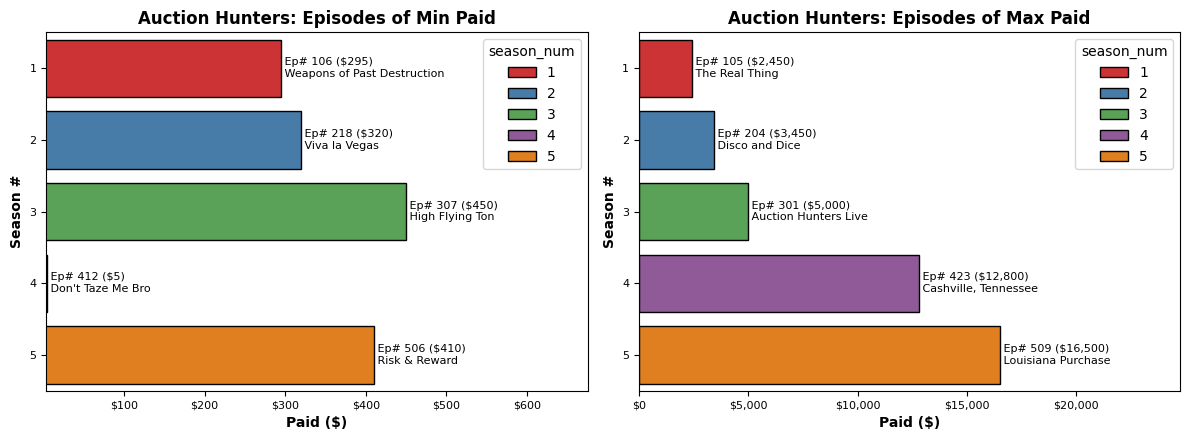

In [11]:
plot_min_max_ep_by_season(min_df=min_paid_ep_by_season_df,
                          max_df=max_paid_ep_by_season_df,
                          category="paid")

#### 1.1.2.2. Paid Findings by Season

* 🕵️ There is a general upwards trend in both the min and max tables.
   * This could be due to confidence in storage unit purchses and turning it around into profit.
   * It could also imply more risk is taken in buying units, trusting their experience to turn it into profit.
   * Perhaps the storage unit locations they visit are more targeted towards higher class people, more likely to store expensive or rare items.
      * i.e. a more secure storage unit facility is more likely to be used for storing expensive things ;)
* 🕵️ However, in season 4 - episode 412, the min unit paid price was just $5. 
   * If something valuable was in this unit, this could mean a very high profit and profit margin!

#### 1.1.2.3. Min and Max Sold

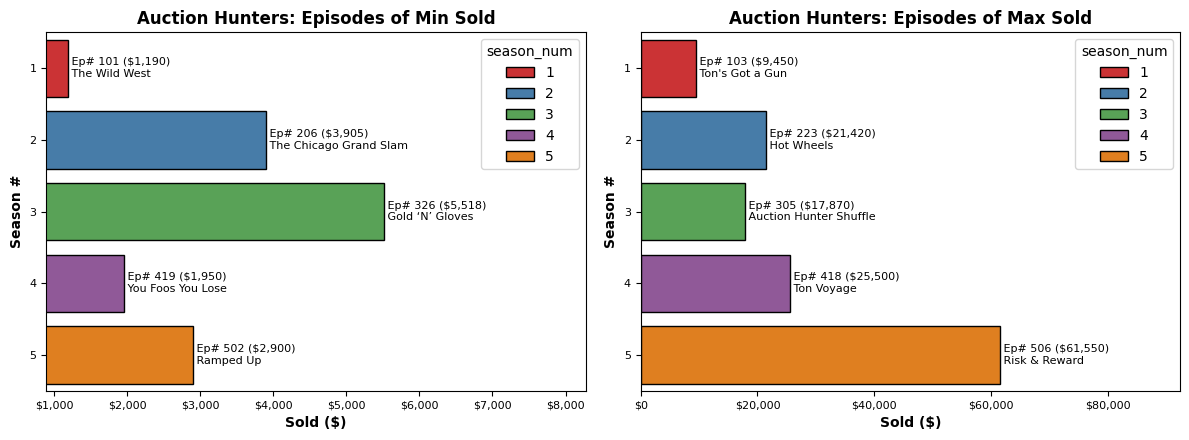

In [12]:
plot_min_max_ep_by_season(min_df=min_sold_ep_by_season_df,
                          max_df=max_sold_ep_by_season_df,
                          category="sold")

#### 1.1.2.4. Sold Findings by Season

* 🕵️ There is a general upwards trend in ONLY the max table.
   * This indicates the value of the contents of the won auction units increased and sale prices were negotiated and remained high.
* 🕵️ There is no obvious consistency in the min table.
   * The min sold increases to a solid value of 5518 in season 3 episode 326, but then drops significantly in season 4 to 1950.

#### 1.1.2.5. Min and Max Profit

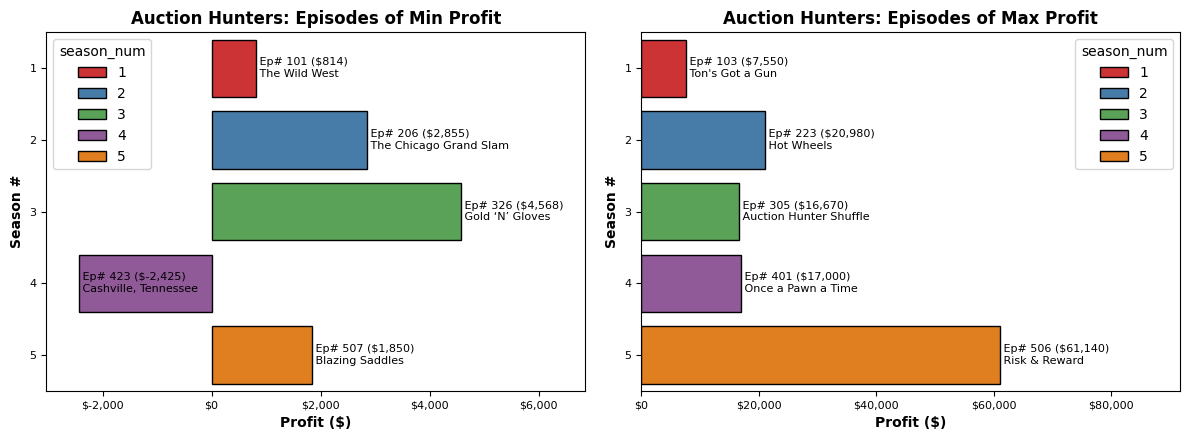

In [13]:
plot_min_max_ep_by_season(min_df=min_profit_ep_by_season_df,
                          max_df=max_profit_ep_by_season_df,
                          category="profit")

#### 1.1.2.6. Profit Findings by Season

* 🕵️ There is a general upwards trend in only the max table.
   * Generally the max profit for a unit is 7.5k-21k.
   * Season 5 episode 506 has an enormous profit, almost 3x the max profit of other seasons.
      * I extracted the description for that episode. The boys sold some famous street art, explaining the high profit ;)
* 🕵️ The min profit appears to increase each season, then in season 4 drops to negative.
   * Episode 423 appears to have lost money. This indicates that too much was paid for the unit, or the contents weren't as good as expected, or both. 👇👇

In [14]:
ep_506_description = df.loc[df['unique_ep_ID'] == 506, 'description'].values[0]
print(ep_506_description)

The guys arrive late to an auction and uncover vintage bear traps and a collection of street art possibly belonging to graffiti artist RISK.


## 1.2. What are the 3 best and worst performing episodes for the entire series (Paid, Sold, Profit)?

* 🏹 To tackle this problem, I will first start by showing the entire series data for each category.
* 🏹 Then, I will create dataframes ranking each category.

### 1.2.1. Paid, Sold, Profit Categories for Series - Visualisation

In [15]:
def show_basic_feature_plot(dataframe, feature_col, unit):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and other monetary values and plots them, index vs. feature_col.
    """
    
    if unit not in ["$", "%"]:
        raise ValueError("Unit must be '$' or '%'. Check input and try again.") 
        
    df = dataframe

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=df.index, y=feature_col, hue='season_num', palette='Set1')

    # Initialize a counter to keep track of the episode index across seasons
    episode_counter = 0

    # Annotate the line with unique_ep_ID
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            unique_ep_ID = df.loc[episode_counter, 'unique_ep_ID']
            ax.annotate(f'{unique_ep_ID}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=6)
            episode_counter += 1  # Increment the episode counter

    plt.xlabel('Episode Index (Number)', weight='bold')
    plt.ylabel(f"{feature_col.capitalize()}", weight='bold')
    plt.title(f"{feature_col.capitalize()} vs. Episode Index (with unique episode ID annotations)", weight='bold', fontsize=16)
    plt.legend(title='Season')

    # Add more gridlines
    ax.set_xticks(range(0, len(df), 10))

    # Format y-axis labels with comma separator
    axis_format = '${x:,.0f}' if unit == "$" else '{x:,.0f}%'
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))

    plt.grid(True)  # Add grid lines to both x and y axes
    plt.tight_layout()
    plt.show()

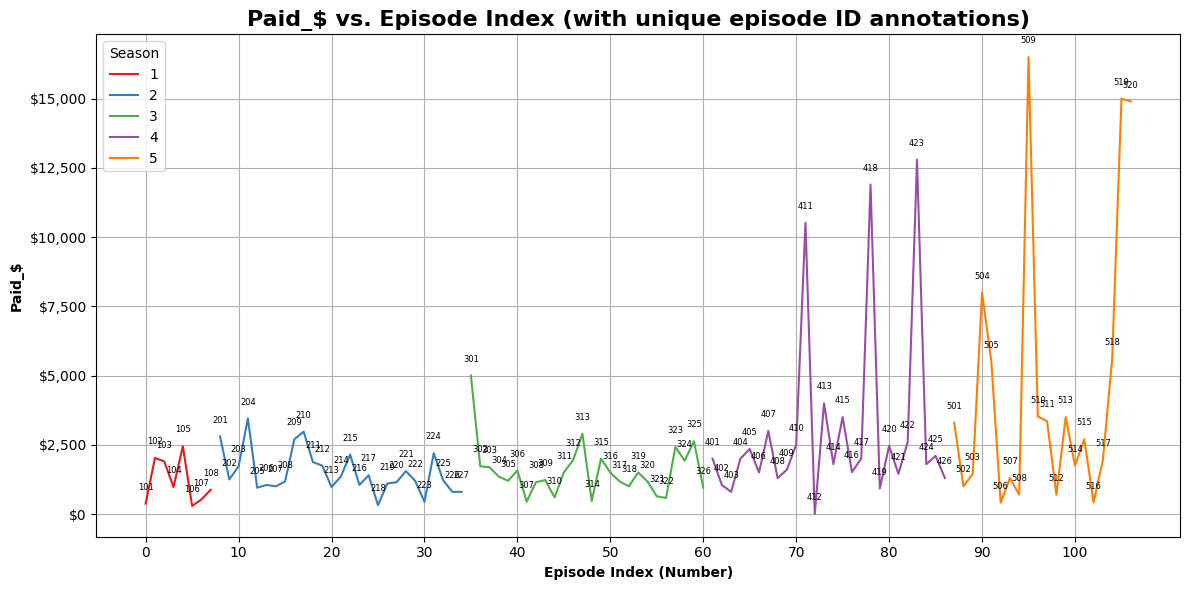

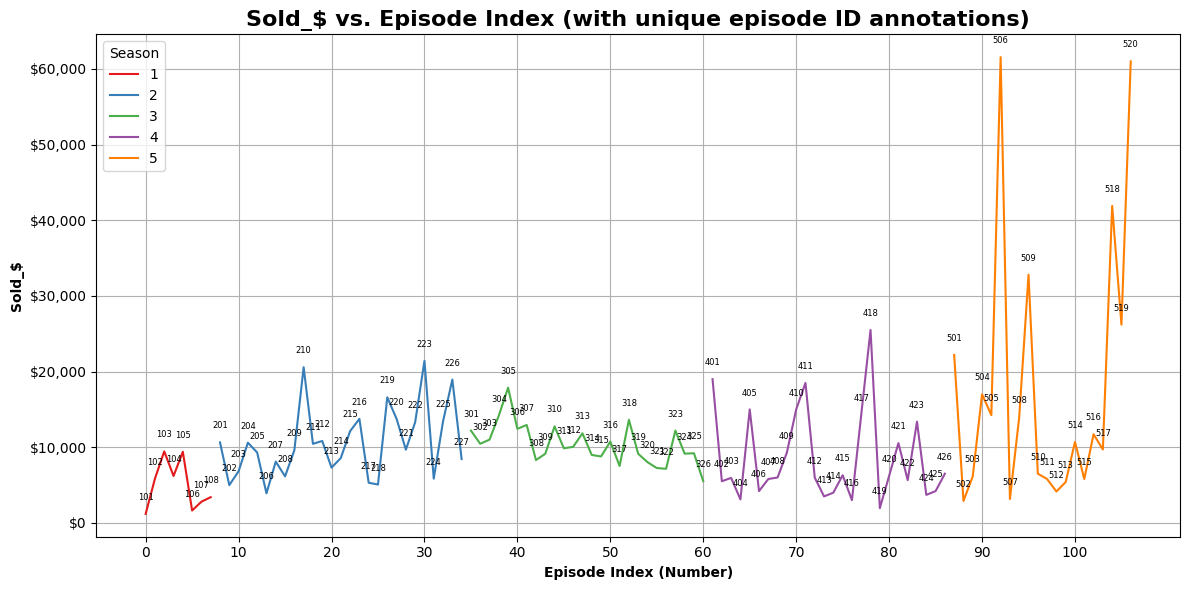

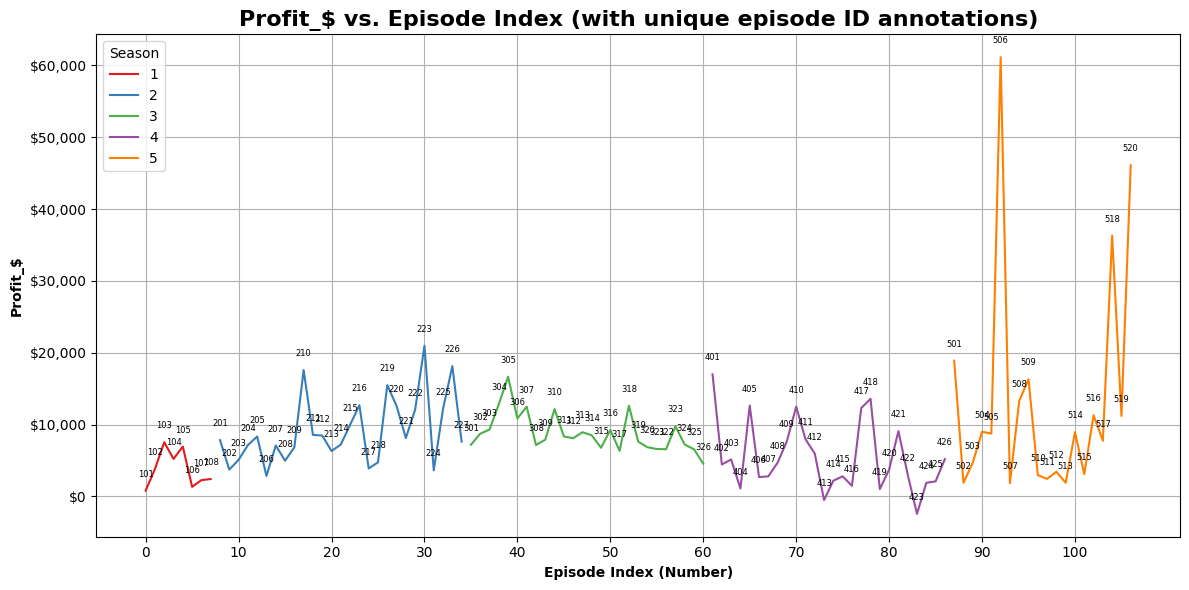

In [16]:
list_of_features_to_plot = ['paid_$', 'sold_$', 'profit_$']
for feature in list_of_features_to_plot:
    show_basic_feature_plot(df, feature, "$")

### 1.2.2. What are the 3 Best / Worst for each monetary category in the entire series?

#### 1.2.2.1. First, I will make a simplified dataframe

In [17]:
threes_cols = [
    'season_num', 
    'episode_num', 
    'unique_ep_ID',
    'episode_name',
    'location',
    'air_date', 
    'paid_$', 
    'sold_$', 
    'profit_$'
]

In [18]:
df_threes = df.loc[:, threes_cols]

#### 1.2.2.2. Then, I will preprare a plotting function

In [19]:
def plot_best_worst_three_eps(worst_df, best_df, category: str, left_caption, right_caption, left_legend_pos="best", right_legend_pos="best"):
    """
    Choose a category such as paid, sold, profit. Then pass in your best and worst dataframes from the selected category.
    You need to add a caption to the left and right graph as appropriate.
    If you need to move the legend, use any of the following arguments: 
    "upper right", "upper left", "lower left", "lower right", "right", "center left", "center right", "lower center", "upper center", "center"
    """
    
    ax_font_size = 10
    title_font_size = 12
    annot_font_size = 8
    ax_ticks_font_size = 8
    
    cat_to_col_dict = {
        "paid":"paid_$", 
        "sold":"sold_$", 
        "profit":"profit_$",
        "profit_margin": "profit_margin_%",
        "roi": "roi_%"
    }
    
    units_dict = {
        "paid":"$", 
        "sold":"$", 
        "profit":"$",
        "profit_margin": "%",
        "roi": "%"
    }  
    
    if category not in cat_to_col_dict.keys():
        raise ValueError("Category argument must be 'paid', 'sold' or 'profit', profit_margin or roi. Check input and try again.") 
        
    x_col = cat_to_col_dict[category]
    ylabels = ['1st', '2nd', '3rd']
    units = "$" if units_dict[category] == "$" else "%"  # Define units based on the condition
    axis_format = '${x:,.0f}' if units == "$" else '{x:,.0f}%'

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    
    ##### LEFT MIN PLOT ######

    # 1. Plot minimum values on the left subplot
    ax1 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=worst_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#3C76B9','#558EB4','#859DAD'],
                     # palette="Set2",
                     ax=axes[0],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    for index, row in worst_df.iterrows():
        value_min = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
        ax1.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_min})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    
    # 3. Plot the decorators and specify the formatting
    ax1.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax1.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax1.set_title(f"Auction Hunters: {left_caption}", weight='bold', fontsize=title_font_size)
    # ax1.set_xlim(0, min_df[x_col].max() + 10000)
    ax1.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax1.legend(loc=left_legend_pos)


    # 4. For the minimum only, with potential negative numbers, specify the plotting range.
    if worst_df[x_col].min() > 0:
        ax1.set_xlim(0.70*worst_df[x_col].min(), 1.25*worst_df[x_col].max())
    else:
        ax1.set_xlim(1.25*worst_df[x_col].min(), 1.25*worst_df[x_col].max())

        
    ##### RIGHT MAX PLOT ######
    
    # 1. Plot minimum values on the left subplot
    ax2 = sns.barplot(x=x_col, 
                     y=ylabels, 
                     data=best_df, 
                     hue=ylabels, 
                     dodge=False, 
                     orient='h',
                     palette=['#D1495B','#E9724C','#FFC857'],
                     # palette="Set2",
                     ax=axes[1],
                     edgecolor='black')
    
    # 2. Plot the annotations on the plot 
    for index, row in best_df.iterrows():
        value_best = f"${row[x_col]:,.0f}" if units == "$" else f"{row[x_col]:,.2f}%"  # Format the value based on units
        ax2.text(row[x_col], index, f" Ep# {row['unique_ep_ID']} ({value_best})\n {row['episode_name']}", va='center').set_fontsize(annot_font_size)
    
    # 3. Plot the decorators and specify the formatting
    ax2.set_xlabel(f"{category.capitalize()} ({units})", fontsize=ax_font_size, weight="bold")
    ax2.set_ylabel('Ranking', fontsize=ax_font_size, weight="bold")
    ax2.set_title(f"Auction Hunters: {right_caption}", weight='bold', fontsize=title_font_size)
    ax2.set_xlim(0, 1.60* best_df[x_col].max())
    ax2.tick_params(axis='both', which='both', labelsize=ax_ticks_font_size)
    ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter(axis_format))
    ax2.legend(loc=right_legend_pos)


    plt.tight_layout()
    plt.show()

#### 1.2.2.1. The 3 "Best" Performing: Paid. i.e. **3 Cheapest Purchased Units**

In [20]:
df_3best_paid = df_threes.sort_values(by='paid_$', ascending=True).head(3).reset_index(drop=True)
df_3best_paid

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965
1,1,6,106,Weapons of Past Destruction,"Sunset Boulevard, California",2010-12-07,295,1635,1340
2,2,18,218,Viva la Vegas,"Henderson, Nevada",2011-08-30,320,5070,4750


#### 1.2.2.2. The 3 "Worst" Performing: Paid i.e. **3 Most Expensive Purchased Units**

In [21]:
df_3worst_paid = df_threes.sort_values(by='paid_$', ascending=False).head(3).reset_index(drop=True)
df_3worst_paid

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,9,509,Louisiana Purchase,"New Orleans, Louisiana",2014-12-20,16500,32800,16300
1,5,19,519,Brew-Phoria,"Mission Hills, California",2015-05-09,15000,26200,11200
2,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100


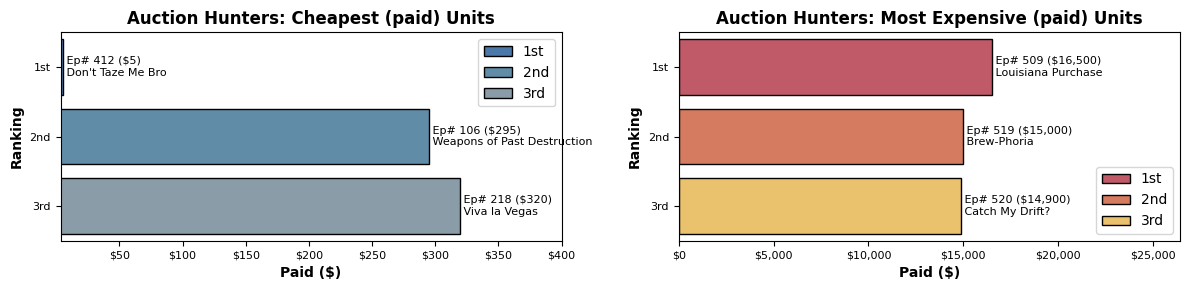

In [22]:
plot_best_worst_three_eps(df_3best_paid, df_3worst_paid, "paid", "Cheapest (paid) Units", "Most Expensive (paid) Units", "best", "lower right")

#### 1.2.2.3. The 3 "Best" Performing: Sold. i.e. **3 Highest Valued Content Units**

In [23]:
df_3best_sold = df_threes.sort_values(by='sold_$', ascending=False).head(3).reset_index(drop=True)
df_3best_sold

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
1,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
2,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.4. The 3 "Worst" Performing: Sold. i.e. **3 Lowest Valued Content Units**

In [24]:
df_3worst_sold = df_threes.sort_values(by='sold_$', ascending=True).head(3).reset_index(drop=True)
df_3worst_sold

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814
1,1,6,106,Weapons of Past Destruction,"Sunset Boulevard, California",2010-12-07,295,1635,1340
2,4,19,419,You Foos You Lose,"West Los Angeles, California",2014-02-22,925,1950,1025


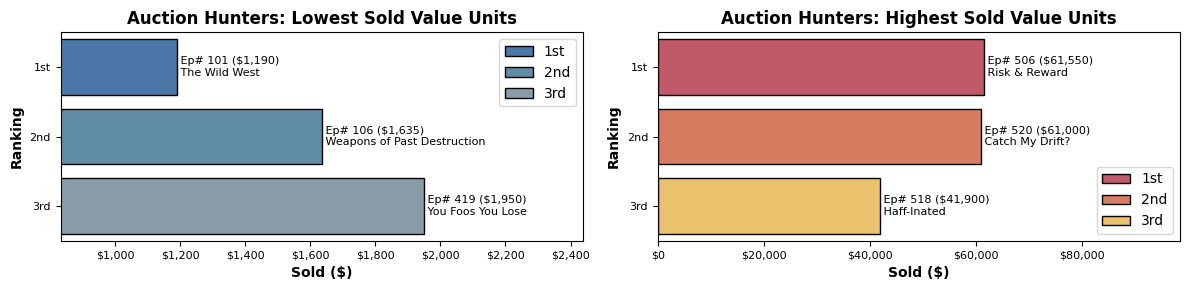

In [25]:
plot_best_worst_three_eps(df_3worst_sold, df_3best_sold, "sold", "Lowest Sold Value Units", "Highest Sold Value Units", "best", "lower right")

#### 1.2.2.5. The 3 "Best" Performing: Profit. i.e. **3 Highest Profit Units**

In [26]:
df_3best_profit = df_threes.sort_values(by='profit_$', ascending=False).head(3).reset_index(drop=True)
df_3best_profit

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140
1,5,20,520,Catch My Drift?,"Norwalk, California",2015-05-09,14900,61000,46100
2,5,18,518,Haff-Inated,"Valencia, California",2015-05-02,5600,41900,36300


#### 1.2.2.5. The 3 "Worst" Performing: Profit. i.e. **3 Lowest Profit Units**

In [27]:
df_3worst_profit = df_threes.sort_values(by='profit_$', ascending=True).head(3).reset_index(drop=True)
df_3worst_profit

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500
2,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814


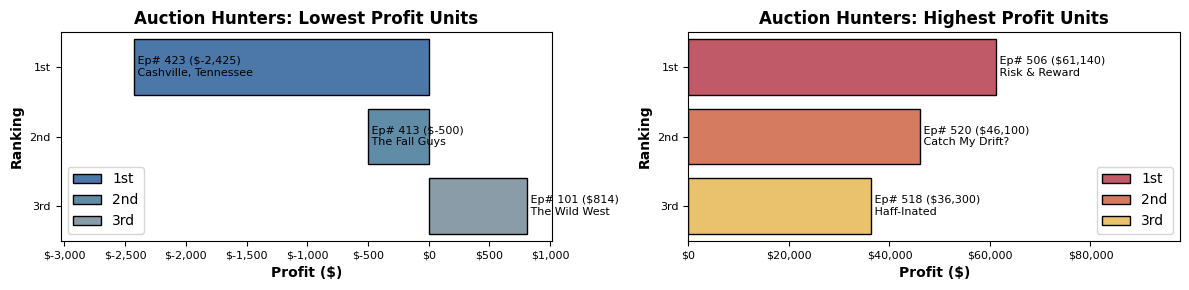

In [28]:
plot_best_worst_three_eps(df_3worst_profit, df_3best_profit, "profit", "Lowest Profit Units", "Highest Profit Units", "best", "lower right")

## 1.3. What is the Profit Margin per episode?

* 📊 Profit Margin is the % amount of money that a business keeps after expenses.
* 📊 Simply put, profit margin is the profit to revenue ratio expressed as **(profit/revenue)\*100**.

In [29]:
df_pm_roi = df.loc[:, threes_cols]
df_pm_roi['profit_margin_%'] = round((df['profit_$'] / df['sold_$']) * 100, 2)
df_pm_roi['roi_%'] = round((df['profit_$'] / df['paid_$']) * 100, 2)
df_pm_roi.head(1)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,376,1190,814,68.4,216.49


### 1.3.1. Visualise the Data

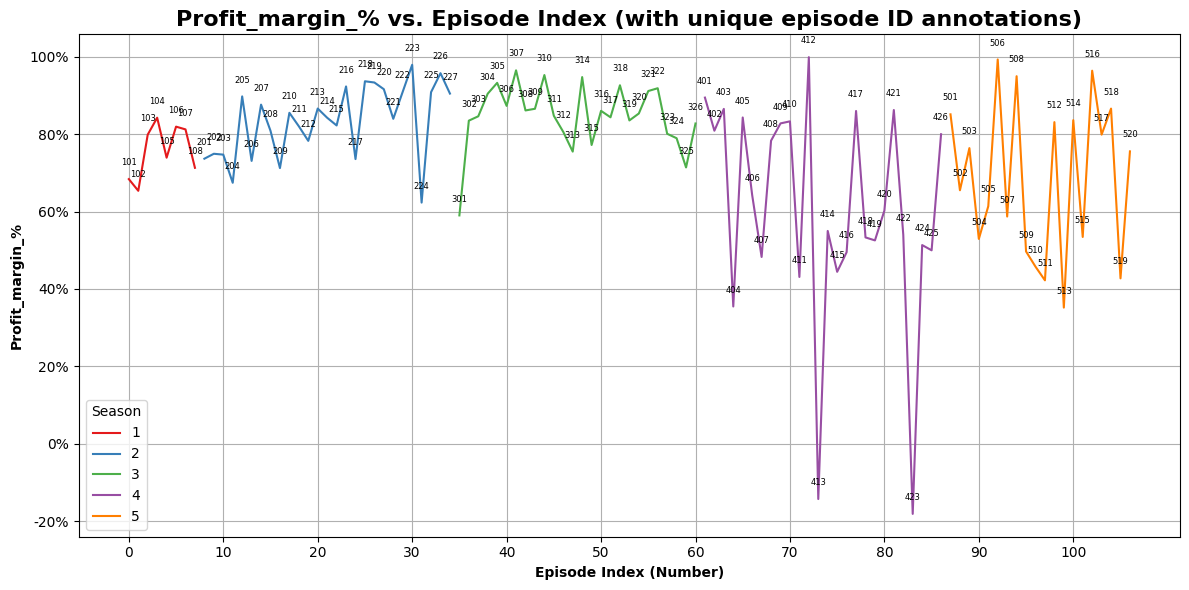

In [30]:
show_basic_feature_plot(dataframe=df_pm_roi, feature_col='profit_margin_%', unit="%")

### 1.3.2. What are the 3 Highest Profit Margin Episodes?

In [31]:
df_3best_profit_margin = df_pm_roi.sort_values(by='profit_margin_%', ascending=False).head(3).reset_index(drop=True)
df_3best_profit_margin

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.00
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33,14912.20
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95,4768.18


### 1.3.3. What are the 3 Lowest Profit Margin Episodes?

In [32]:
df_3worst_profit_margin = df_pm_roi.sort_values(by='profit_margin_%', ascending=True).head(3).reset_index(drop=True)
df_3worst_profit_margin

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425,-18.13,-18.95
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500,-14.29,-12.50
2,5,13,513,Wreck-Shaw,"Santa Clarita, California",2015-04-18,3500,5400,1900,35.19,54.29


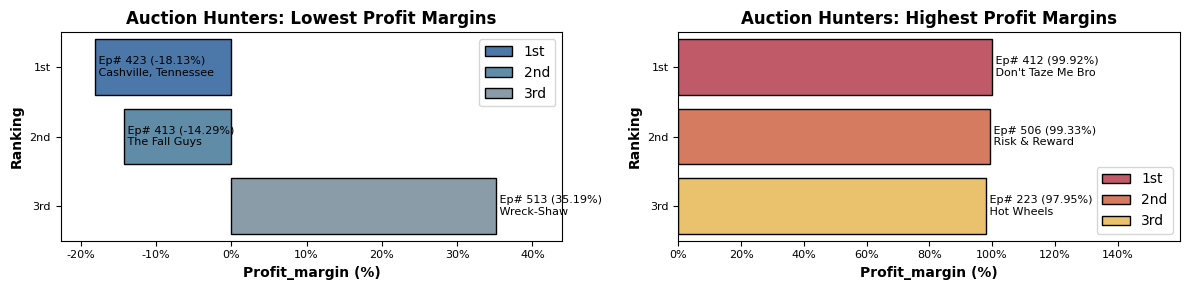

In [33]:
plot_best_worst_three_eps(df_3worst_profit_margin, df_3best_profit_margin, "profit_margin", "Lowest Profit Margins", "Highest Profit Margins", "upper right", "lower right")

### 1.3.4. What is the average profit margin for the entire series?

In [34]:
average_profit_margin = round(df_pm_roi.loc[:,'profit_margin_%'].mean(), 1)
print(f"📈 The Average Profit Margin for the Auction Hunters Series is: {average_profit_margin}%.")

📈 The Average Profit Margin for the Auction Hunters Series is: 74.7%.


### 1.3.5. What is the average profit margin per season?

In [35]:
average_profit_margin_by_season = df_pm_roi.groupby('season_num')['profit_margin_%'].mean().reset_index()
average_profit_margin_by_season['profit_margin_%'] = average_profit_margin_by_season['profit_margin_%'].round(1)
average_profit_margin_by_season

,season_num,profit_margin_%
0,1,75.8
1,2,83.3
2,3,84.8
3,4,60.3
4,5,68.4


In [36]:
def show_violin_plot_profit_margin(dataframe, average_profit_margin_float: float):
    """
    This function draws a profit margin graph taking a dataframe with 5 seasons vs profit_margin_% column.
    Then, it takes in the series_average
    """
    
    plt.figure(figsize=(12, 6))

    colors = sns.color_palette("Set1", n_colors=len(dataframe['season_num'].unique()))
    ax = sns.violinplot(data=dataframe, x='season_num', y='profit_margin_%', palette=colors, inner="point", cut=0)
    
    for violin in ax.collections:
        violin.set_edgecolor('black')

    plt.axhline(y=average_profit_margin_float, color='red', linestyle='--', label=f'Series Mean {average_profit_margin_float.round(1)}%')
    # plt.text(0.5, avg_pm_series, f'Series Average: {avg_pm_series:.1f}%', ha='right', va='bottom', fontsize=10, color='red')

    # Annotate mean values on the violins
    means = dataframe.groupby('season_num')['profit_margin_%'].mean()
    for i, season in enumerate(dataframe['season_num'].unique()):
        mean_value = means[season]
        plt.scatter(i, mean_value, c='white', marker='o', s=40)  # Add a dot at the mean value position
        plt.text(i-0.05, mean_value, f'{mean_value:.1f}%', ha='right', va='bottom', fontsize=9, color='black')

    ax.text(0, 2, " Note:\n The white o is the individual\n season's mean profit margin.", size=9, color='red') # 0 is the index, so it means season 1.
    plt.xlabel('Season #', weight="bold", fontsize=12)
    plt.ylabel('Profit Margin (%)', weight="bold", fontsize=12)
    plt.title('Auction Hunters: Profit Margin Distribution by Season', weight="bold", fontsize=16)
    plt.legend()
    plt.grid(True)
    ax.set_axisbelow(True)
    
    plt.show()
    

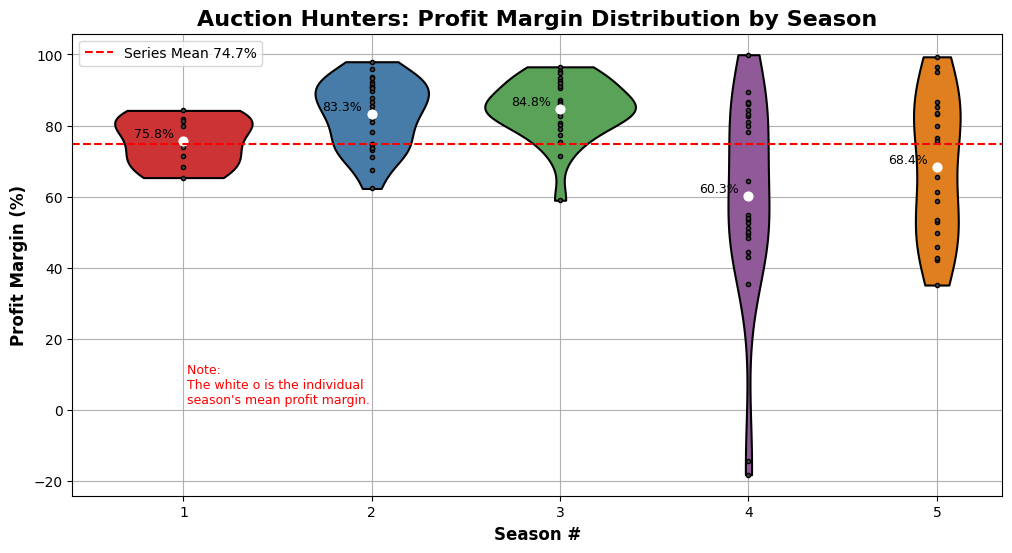

In [37]:
show_violin_plot_profit_margin(dataframe=df_pm_roi, average_profit_margin_float=average_profit_margin)

## 1.4. What is the Return on Investment (ROI) per episode?

### 1.4.1. Visualise the Data

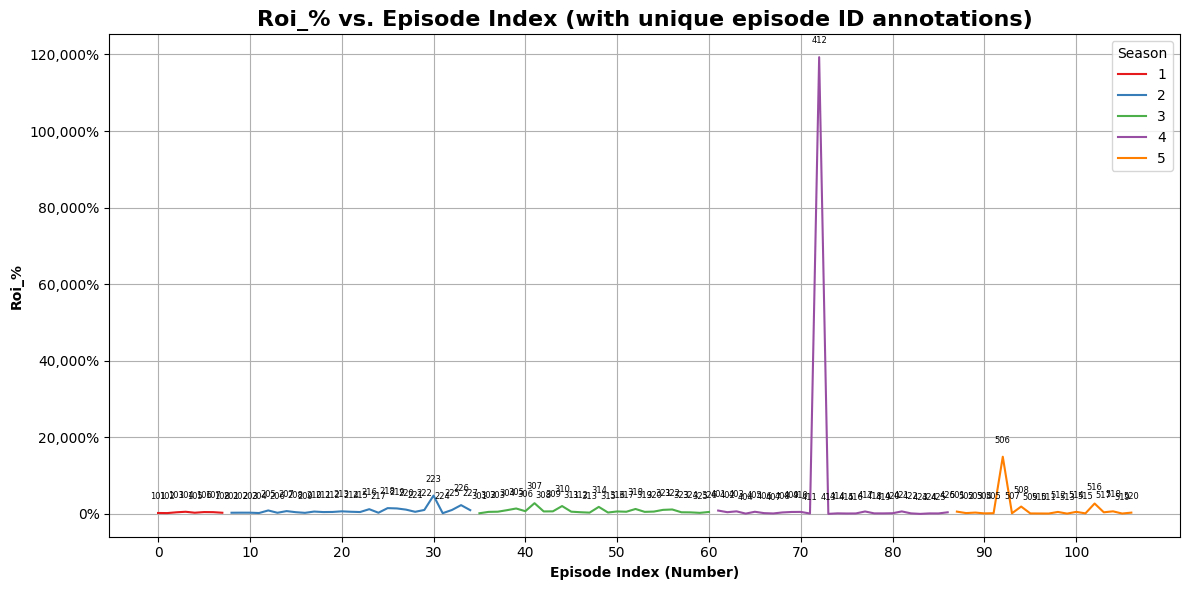

In [38]:
show_basic_feature_plot(dataframe=df_pm_roi, feature_col='roi_%', unit="%")

**⚠️ We can't see anything for most episodes because ep 412 has an enormous ROI over 100,000%**

In [39]:
show_me(df_pm_roi, 412)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
72,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.0


### 1.4.2. What are the 3 highest ROI episodes in the series?

In [40]:
df_3best_roi = df_pm_roi.sort_values(by='roi_%', ascending=False).head(3).reset_index(drop=True)
df_3best_roi

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.00
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33,14912.20
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95,4768.18


### 1.4.3. What are the 3 lowest ROI episodes in the series?

In [41]:
df_3worst_roi = df_pm_roi.sort_values(by='roi_%', ascending=True).head(3).reset_index(drop=True)
df_3worst_roi

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,23,423,"Cashville, Tennessee","Nashville, Tennessee",2014-03-29,12800,13375,-2425,-18.13,-18.95
1,4,13,413,The Fall Guys,"Reseda, Los Angeles, California",2013-04-13,4000,3500,-500,-14.29,-12.50
2,5,13,513,Wreck-Shaw,"Santa Clarita, California",2015-04-18,3500,5400,1900,35.19,54.29


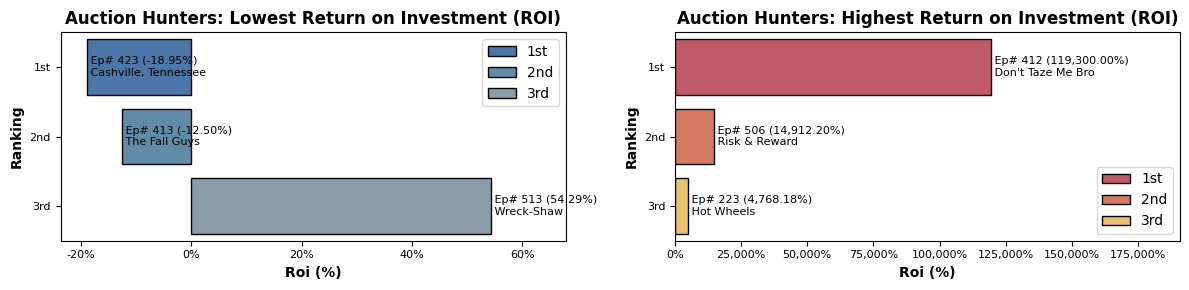

In [42]:
plot_best_worst_three_eps(df_3worst_roi, df_3best_roi, "roi", "Lowest Return on Investment (ROI)", "Highest Return on Investment (ROI)", "upper right", "lower right")

### 1.4.4. What is the average ROI and Standard Deviation over the entire series?

In [43]:
average_roi_series = round(df_pm_roi.loc[:,'roi_%'].mean(), 1)
std_dev_roi_series = round(df_pm_roi.loc[:,'roi_%'].std(), 1)
print(f"📈 The Average ROI for the Auction Hunters Series is: {average_roi_series}%.")
print(f"📈 The Average ROI Standard Deviation for the Auction Hunters Series is: {std_dev_roi_series}%.")

📈 The Average ROI for the Auction Hunters Series is: 1837.8%.
📈 The Average ROI Standard Deviation for the Auction Hunters Series is: 11565.4%.


**⚠️ It is evident that the series average ROI is just over 1800%. The graph shows that there are probably just a few episodes that are above this value, weighing it higher. I believe if we exclude the outliers, a more realistic ROI is revealed and it will be much lower. Let's investigate!**

### 1.4.5. ROI Distribution with Outliers (i.e. all episodes) (Histogram)

In [44]:
def plot_histogram(df, title_append):
    """
    Draws a histogram for the entered dataframe and specified column.
    You can append the title if you adjust the dataframe.
    e.g. title_append = "with outliers > 2000% removed"
    """
    # col_name = 
    data = df['roi_%']

    # Create a 1x1 subplot figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Generate Title
    if title_append == "":
        histo_title = f'Histogram of ROI% Distribution'
    else:
        histo_title = f'Histogram of ROI% Distribution\n{title_append}'

    # Plot the histogram
    bins = np.linspace(min(data), max(data), 20)  # Specify bin edges
    ax.hist(data, bins=bins, color='#FA8072', edgecolor='black', density=True) # color is salmon pink ;)
    ax.set_xlabel("ROI %", weight='bold')
    ax.set_ylabel('Probability Density', weight='bold')
    ax.set_title(histo_title, weight='bold')

    # Format label ticks
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    # Add a grid
    ax.set_axisbelow(True)
    ax.grid()

    plt.tight_layout()  # Ensure proper spacing
    plt.show()

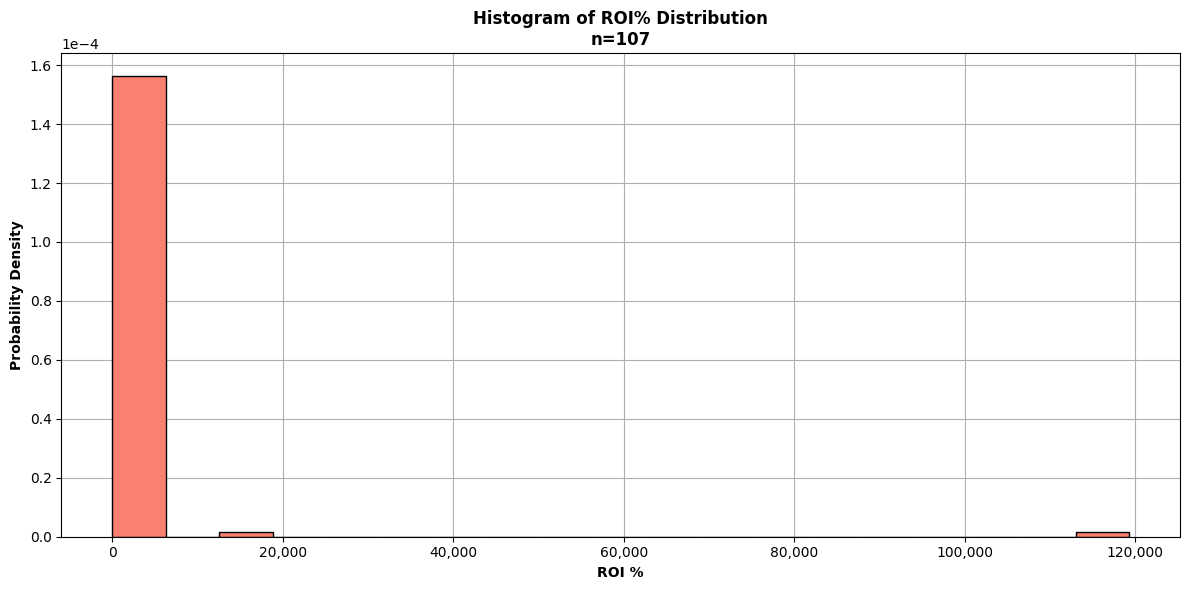

In [45]:
plot_histogram(df_pm_roi, f"n={len(df_pm_roi)}")

**😦 Wow. The outliers put an ROI% of -%10,000 in the first standard deviation! Of course, this is not a Guassian Distribution - just for our curiosity and testing my plot function.**

### 1.4.6. ROI Distribution ❌ No Outliers!

* 🎯 Let's set a limit of 2000% to filter out the massive ROI episodes. 
   * 👉 The filtered out episodes will inherently have the biggest ROIs!
   * 👉 As you will see, the mean ROI and St Dev will reduce significantly after filtering roi_% > 2000.
* ❓ What are these "filtered" episodes? Let's see!

#### 1.4.6.1. Extracting and Ranking the Top (outlier) ROI Episodes!

In [46]:
roi_ceiling = 2000
df_roi_outliers = df_pm_roi[df_pm_roi['roi_%'] > roi_ceiling].sort_values('roi_%', ascending=False).reset_index(drop=True)
df_roi_outliers

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,paid_$,sold_$,profit_$,profit_margin_%,roi_%
0,4,12,412,Don't Taze Me Bro,"Stanton, California",2013-04-13,5,5970,5965,99.92,119300.00
1,5,6,506,Risk & Reward,"Mission Hills, California",2014-11-22,410,61550,61140,99.33,14912.20
2,2,23,223,Hot Wheels,"Palm Springs, California",2011-11-01,440,21420,20980,97.95,4768.18
3,3,7,307,High Flying Ton,"Ventura, California",2012-04-18,450,12940,12490,96.52,2775.56
4,5,16,516,Pucks for Bucks,"Torrance, California",2015-04-25,420,11720,11300,96.42,2690.48
5,2,26,226,Reel Money,"San Diego, California",2011-11-22,800,18940,18140,95.78,2267.50
6,3,10,310,Fake Punt Payoff,"Pasadena, California",2012-05-09,600,12760,12160,95.30,2026.67


In [47]:
print(f"There are {len(df_roi_outliers)} Outliers in our dataset with an ROI greater than {roi_ceiling}%.")
num_non_outliers = len(df)-len(df_roi_outliers)
print(f"This means there are {num_non_outliers} episodes in the No Outliers Dataframe")

There are 7 Outliers in our dataset with an ROI greater than 2000%.
This means there are 100 episodes in the No Outliers Dataframe


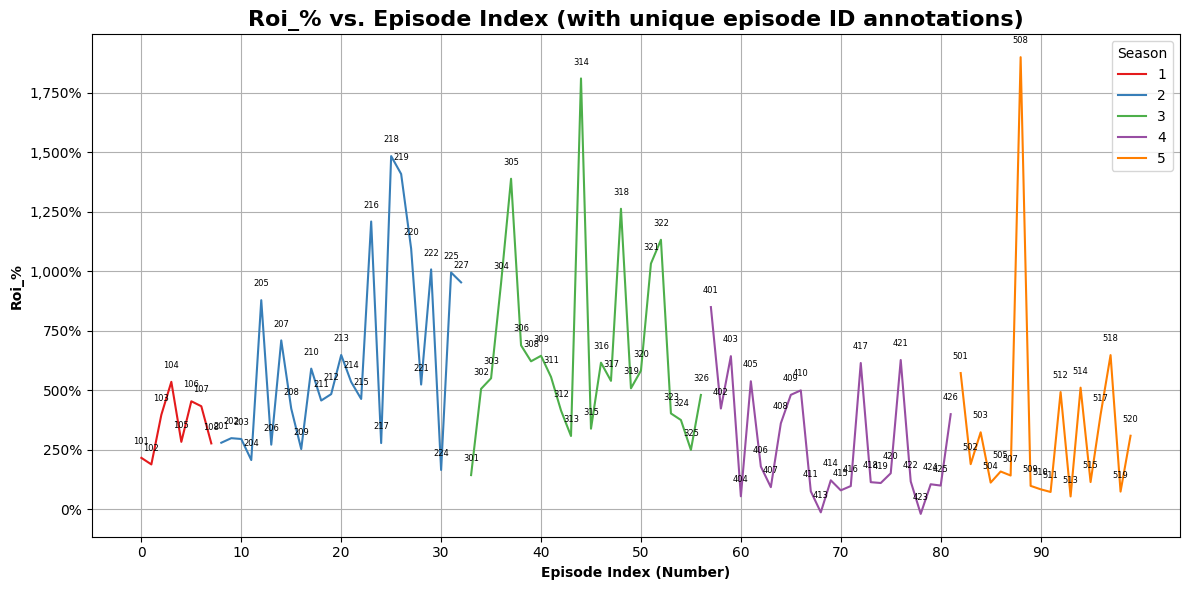

In [48]:
# Show ROI values only under 2000%
df_ROI_no_outliers = df_pm_roi[df_pm_roi['roi_%'] <= roi_ceiling].reset_index()
show_basic_feature_plot(dataframe=df_ROI_no_outliers, feature_col='roi_%', unit="%")

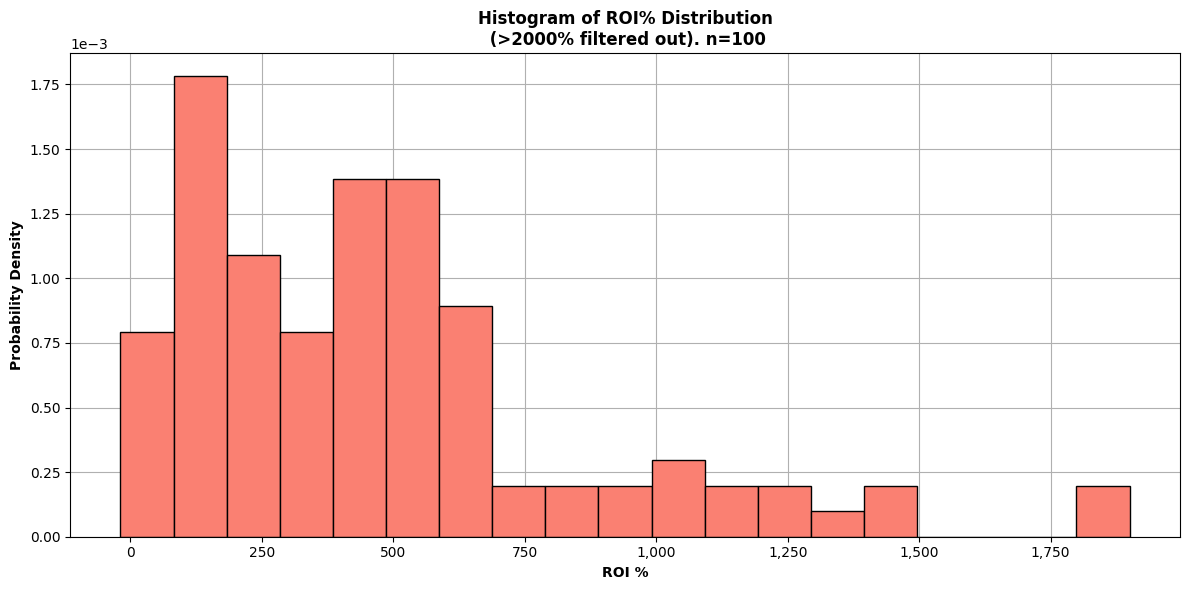

In [49]:
plot_histogram(df=df_pm_roi[df_pm_roi['roi_%'] < 2000], title_append=f" (>2000% filtered out). n={num_non_outliers}")

**🚧 Even after removing outliers, we still have right (positive) skewed data. The guassian plot as it's just for illustration (we aren't "normal" here 😄)**

#### 1.4.6.2. Average ROI and Standard Deviation Compared over Series

In [50]:
average_roi_series_no_outliers = round(df_ROI_no_outliers.loc[:,'roi_%'].mean(), 1)
std_dev_roi_series_no_outliers = round(df_ROI_no_outliers.loc[:,'roi_%'].std(), 1)
print(f"📈 The Average ROI for the Auction Hunters (No Outliers) Series is: {average_roi_series_no_outliers}%.")
print(f"📈 The Average ROI Standard Deviation for the Auction Hunters (No Outliers) Series is: {std_dev_roi_series_no_outliers}%.")

📈 The Average ROI for the Auction Hunters (No Outliers) Series is: 479.0%.
📈 The Average ROI Standard Deviation for the Auction Hunters (No Outliers) Series is: 389.8%.


#### 1.4.6.3. Let's Put the Average and Standard Deviation Table Together

In [51]:
data = [[average_roi_series, average_roi_series_no_outliers], [std_dev_roi_series, std_dev_roi_series_no_outliers]]
cols = ['all_episodes_roi_%', 'no_outliers_roi_%']
index = ['Mean', 'St. Dev']
roi_average_std_series_with_without_outliers_df = pd.DataFrame(data=data, columns=cols, index=index)
roi_average_std_series_with_without_outliers_df

,all_episodes_roi_%,no_outliers_roi_%
Mean,1837.8,479.0
St. Dev,11565.4,389.8


#### 1.4.6.4. Visualising the Data

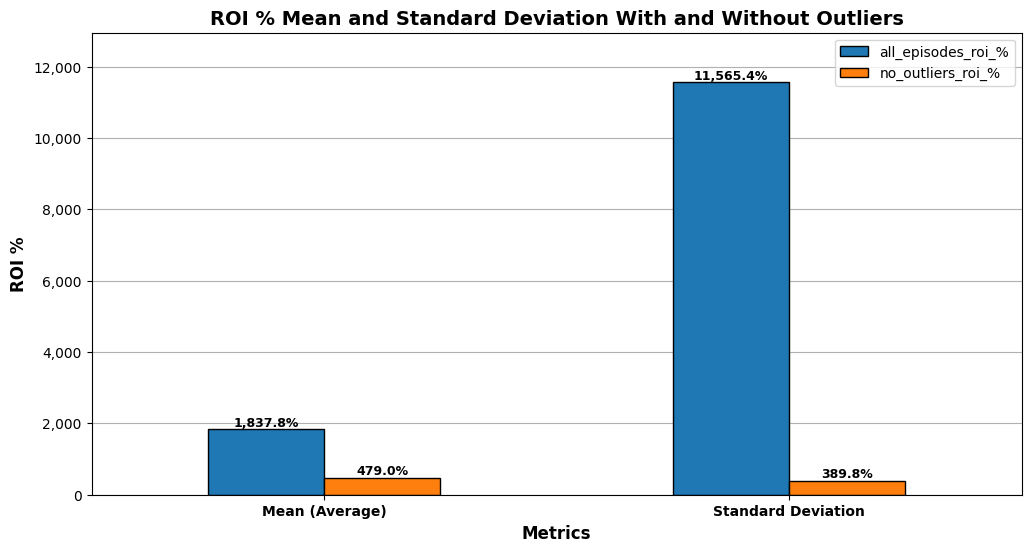

In [52]:
ax = roi_average_std_series_with_without_outliers_df.plot(
    kind="bar", 
    ylabel="ROI %", 
    figsize=(12,6), 
    edgecolor='black')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', weight="bold", fontsize=9, color='black')

# Extend the y axis a little bit and format the numbers to have commas.
ax.set_ylim(0, 1.12 * roi_average_std_series_with_without_outliers_df.max().max())
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
custom_xticklabels = ['Mean (Average)', 'Standard Deviation']
ax.set_xticklabels(custom_xticklabels, fontsize=10, fontweight="bold", rotation=0)
ax.set_axisbelow(True)

# Make the title and axis texts bold
ax.set_title("ROI % Mean and Standard Deviation With and Without Outliers", fontsize=14, fontweight="bold")
ax.set_xlabel("Metrics", fontsize=12, fontweight="bold")
ax.set_ylabel("ROI %", fontsize=12, fontweight="bold")
ax.grid(axis='y')

plt.show()

* **😮 This bar plot shows how significant the impact of the 7 outlier (>2000% ROI) episodes are on the entire dataset.** 
   * **After filtering those episodes, we were able to reduce the mean and standard deviation of ROI % by multiple factors to a more realistic size.**

### 1.4.7. What is the average ROI per season (with AND without outliers)?

In [53]:
average_roi_by_season_df = df_pm_roi.groupby('season_num')['roi_%'].mean().reset_index()
average_roi_by_season_df['roi_%'] = average_roi_by_season_df['roi_%'].round(2)

average_roi_by_season_no_outliers_df = df_ROI_no_outliers.groupby('season_num')['roi_%'].mean().reset_index()
average_roi_by_season_no_outliers_df['roi_%'] = average_roi_by_season_no_outliers_df['roi_%'].round(2)

average_roi_by_season_df.rename(columns={'roi_%': 'all_episodes_roi_%'}, inplace=True)
average_roi_by_season_no_outliers_df.rename(columns={'roi_%': 'no_outliers_roi_%'}, inplace=True)

average_roi_by_season_outliers_merged_df = average_roi_by_season_df.merge(average_roi_by_season_no_outliers_df, 
                                                                       on='season_num', 
                                                                       how='left')

average_roi_by_season_outliers_merged_df['difference'] = average_roi_by_season_outliers_merged_df['all_episodes_roi_%'] - average_roi_by_season_outliers_merged_df['no_outliers_roi_%']
average_roi_by_season_outliers_merged_df['ratio'] = round(average_roi_by_season_outliers_merged_df['all_episodes_roi_%'] / average_roi_by_season_outliers_merged_df['no_outliers_roi_%'], 1)

average_roi_by_season_outliers_merged_df

,season_num,all_episodes_roi_%,no_outliers_roi_%,difference,ratio
0,1,348.38,348.38,0.00,1.0
1,2,850.39,637.00,213.39,1.3
2,3,804.44,671.38,133.06,1.2
3,4,4850.53,272.55,4577.98,17.8
4,5,1193.13,347.77,845.36,3.4


#### 1.4.6.1. Visualise the ROI % With and Without Outlier Episodes

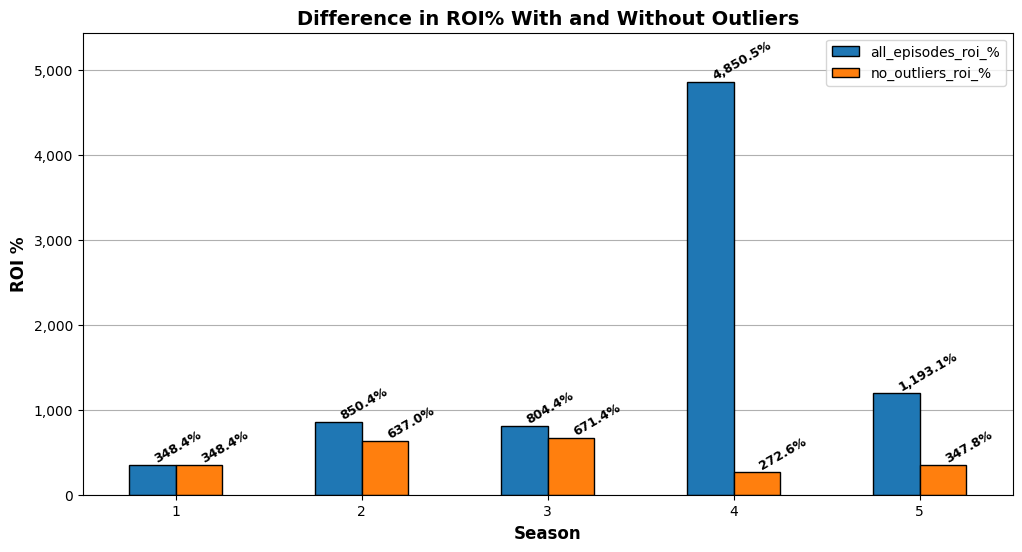

In [54]:
ax = average_roi_by_season_outliers_merged_df.plot(
    x='season_num', 
    y=['all_episodes_roi_%', 'no_outliers_roi_%'], 
    kind="bar", 
    figsize=(12, 6),
    edgecolor='black')

# labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='left', va='bottom', weight="bold", fontsize=9, color='black', rotation=30)

# Extend the y axis a little bit and format the numbers to have commas.
ax.set_ylim(0, 1.12 * average_roi_by_season_outliers_merged_df['all_episodes_roi_%'].max())
ax.set_xlim(-0.5, 4.5)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_axisbelow(True)

# Make the title and axis texts bold
ax.set_title("Difference in ROI% With and Without Outliers", fontsize=14, fontweight="bold")
ax.set_xlabel("Season", fontsize=12, fontweight="bold")
ax.set_ylabel("ROI %", fontsize=12, fontweight="bold")
ax.grid(axis='y')

plt.show()


* **👀 Look at season 4 and 5:**
   * **👉 We removed 1 episode (412) and the average season 4 ROI % goes from 4850% down to 272%.**
   * **👉 We removed 2 episodes (506 and 516) and the average season 5 ROI % goes from 1193% down to 347%.**

## 1.5. What is the relative Paid, Sold, Profit for number of episodes per season?

### 1.5.1. First, generate a table of total paid, sold and profit by season

In [55]:
df_seasons_total = df.groupby('season_num')[['paid_$', 'sold_$', 'profit_$']].sum()
df_seasons_total.rename(columns={'paid_$': 'total_paid_$',
                                'sold_$': 'total_sold_$',
                                'profit_$': 'total_profit_$'}, inplace=True)
df_seasons_total

,total_paid_$,total_sold_$,total_profit_$
season_num,,,
1,9421,39925,30404
2,40410,285450,244380
3,40287,270309,230022
4,78783,222045,140262
5,91556,362870,271314


In [56]:
def plot_total_lines_by_season(df, list_of_input_metrics=['total_paid_$','total_sold_$','total_profit_$'], fill_color=False):
    """
    Plot shaded total value lines for specified metrics by season.
    The input dataframe should contain columns for each season (Season 1, Season 2, etc.)
    and the metrics to be plotted (e.g., total_paid_$, total_sold_$, total_profit_$).
    If fill_color=True, then the plot will be shaded the same color as the line of the metric.
    """
    
    # Check if the 3 input columns are in the dataframe that is passed into this function.
    if len(list_of_input_metrics) > 3:
        raise ValueError("There are currently only 3 colors specified for the plot, so anything more than 3 will require changes to the code (i.e. longer color list).")
    
    missing_columns = [col for col in list_of_input_metrics if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")
    
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Prevent the function from modifying the external dataframe
    df2 = df.copy()
    
    # Define colors for lines
    colors = ['b', 'g', 'r']
    
    # Plot total lines for each metric
    for i, metric in enumerate(list_of_input_metrics):
        ax = sns.lineplot(data=df2, x=df2.index, y=metric, color=colors[i], label=metric, marker="o")
        if fill_color == True:
            ax.fill_between(df2.index, 0, df2[metric], alpha=0.3, color=colors[i])
        
        # Annotate values at each season with $ values
        for j, value in enumerate(df2[metric]):
            plt.text(df2.index[j], value, f'${int(value):,}', ha='right', va='center', fontsize=10)
        
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    plt.title('Auction Hunters: Total Value Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season #', fontsize=12, weight="bold")
    plt.ylabel('Total Metric Value ($)', fontsize=12, weight="bold")
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.yticks(fontsize=10)
    plt.xticks(range(1, 6), fontsize=10)
    plt.xlim(0.65, 5.35) # make space on the left and right edges for annotations
    plt.legend()
    plt.show()

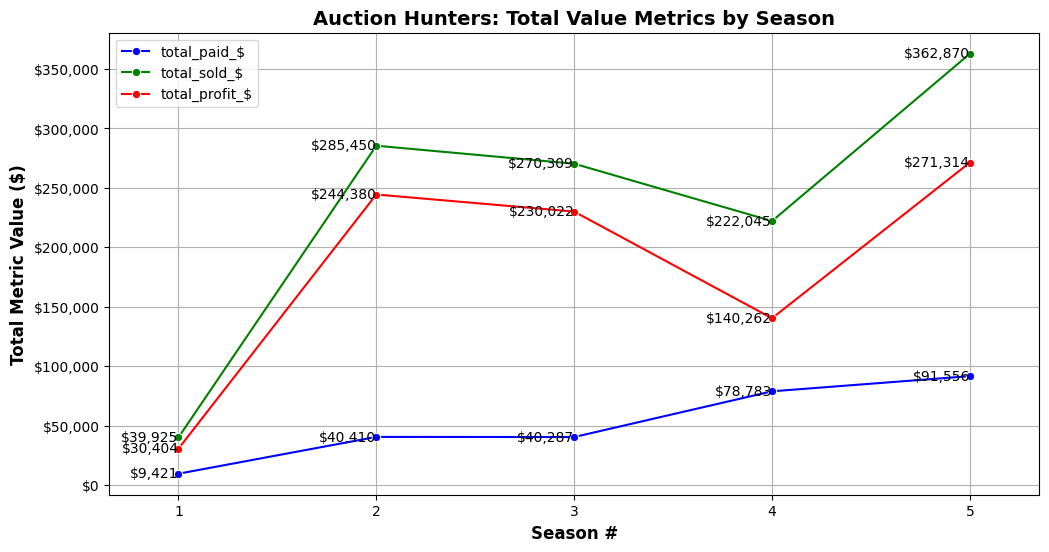

In [57]:
plot_total_lines_by_season(df_seasons_total)

### 1.5.2. Second, let's generate the season episode counts table:

In [58]:
season_episode_counts = df['season_num'].value_counts().sort_index()
season_episode_counts_df = season_episode_counts.reset_index()
season_episode_counts_df.columns = ['season_num', 'episode_count']
season_episode_counts_df

,season_num,episode_count
0,1,8
1,2,27
2,3,26
3,4,26
4,5,20


### 1.5.3. Generate the Relative Values Dataframe (**average per episode by season**)

In [59]:
df_relative_seasons = df_seasons_total.merge(season_episode_counts_df, on='season_num', how='left')
df_relative_seasons['relative_paid_$'] = round(df_relative_seasons['total_paid_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons['relative_sold_$'] = round(df_relative_seasons['total_sold_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons['relative_profit_$'] = round(df_relative_seasons['total_profit_$'] / df_relative_seasons['episode_count'], 2)
df_relative_seasons

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,1,9421,39925,30404,8,1177.62,4990.62,3800.50
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,5,91556,362870,271314,20,4577.80,18143.50,13565.70


### 1.5.4. What is the average paid, sold and profit for the entire series (i.e. the average per episode)?

In [60]:
series_avg_paid = df.loc[:, "paid_$"].mean()
series_avg_sold = df.loc[:, "sold_$"].mean()
series_avg_profit = df.loc[:, "profit_$"].mean()
series_avg_data = {'series_average_paid_$': round(series_avg_paid, 2), 
                   'series_average_sold_$': round(series_avg_sold, 2),
                   'series_average_profit_$': round(series_avg_profit, 2)}

df_relative_series = pd.DataFrame.from_records([series_avg_data])
df_relative_series 

,series_average_paid_$,series_average_sold_$,series_average_profit_$
0,2434.18,11033.64,8564.32


### 1.5.5. Let's visualise how the season average compares with the series average:

In [61]:
def plot_relative_data_vs_series_averages(season_data):
    """
    This function will plot a  dataframe containing columns:
    'season_num', 'total_paid_$', 'total_sold_$', 'total_profit_$', 'episode_count', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$'
    as a bar plot comparing the relative values with the series average values. Average values will be calcluated from the total values in the function.
    """
    
    df3 = season_data.copy()

    required_input_metrics = ['season_num', 'total_paid_$', 'total_sold_$', 'total_profit_$', 'episode_count', 'relative_paid_$', 'relative_sold_$', 'relative_profit_$']
    missing_columns = [col for col in required_input_metrics if col not in df3.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing in the dataframe: {', '.join(missing_columns)}")

    series_avg_paid = round(df3['total_paid_$'].sum() / df3['episode_count'].sum(), 2)
    series_avg_sold = round(df3['total_sold_$'].sum() / df3['episode_count'].sum(), 2)
    series_avg_profit = round(df3['total_profit_$'].sum() / df3['episode_count'].sum(), 2)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the width of the bars
    bar_width = 0.2

    # Set the positions of the bars on the x-axis
    season_positions = np.arange(len(df3['season_num']))

    # Define colors for the bars
    bar_colors = ['b', 'g', 'r']

    # Create the bar plot
    for i, (values, label) in enumerate(zip(['relative_paid_$', 'relative_sold_$', 'relative_profit_$'], ['Season Rel. Paid', 'Season Rel. Sold', 'Season Rel. Profit'])):
        ax.bar(season_positions + i * bar_width, df3[values], bar_width, label=label, color=bar_colors[i], edgecolor='black')

        # Annotate the bar plots
        for x, y in zip(season_positions + i * bar_width, df3[values]):
            ax.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=8, color='black', rotation=30, weight="bold")

        ax.axhline(y=eval(f'series_avg_{values.split("_")[1]}'), color=bar_colors[i], linestyle='--', label=f'Series Avg. {label.split(" ")[-1]}')

        # Annotate the horizontal lines to the left
        ax.annotate(f'${series_avg_paid:.0f}', xy=(-0.45, series_avg_paid+250), fontsize=9, color='black')
        ax.annotate(f'${series_avg_sold:.0f}', xy=(-0.45, series_avg_sold+250), fontsize=9, color='black')
        ax.annotate(f'${series_avg_profit:.0f}', xy=(-0.45, series_avg_profit+250), fontsize=9, color='black')

    # Customize the plot (labels, title, legend, etc.)
    ax.set_xticks(season_positions + bar_width)
    ax.set_xticklabels(df3['season_num'])
    ax.set_xlabel('Season #', weight="bold")
    ax.set_ylabel('Dollar Amount ($)', weight="bold")
    ax.set_title('Season Relative Metrics vs. Series Average Metrics', weight="bold")
    ax.set_ylim(0, 1.15 * df3[['relative_paid_$', 'relative_sold_$', 'relative_profit_$']].max().max())
    ax.set_xlim(-0.5, 5)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    ax.grid(True)

    ax.legend()

    # Show the plot
    plt.show()

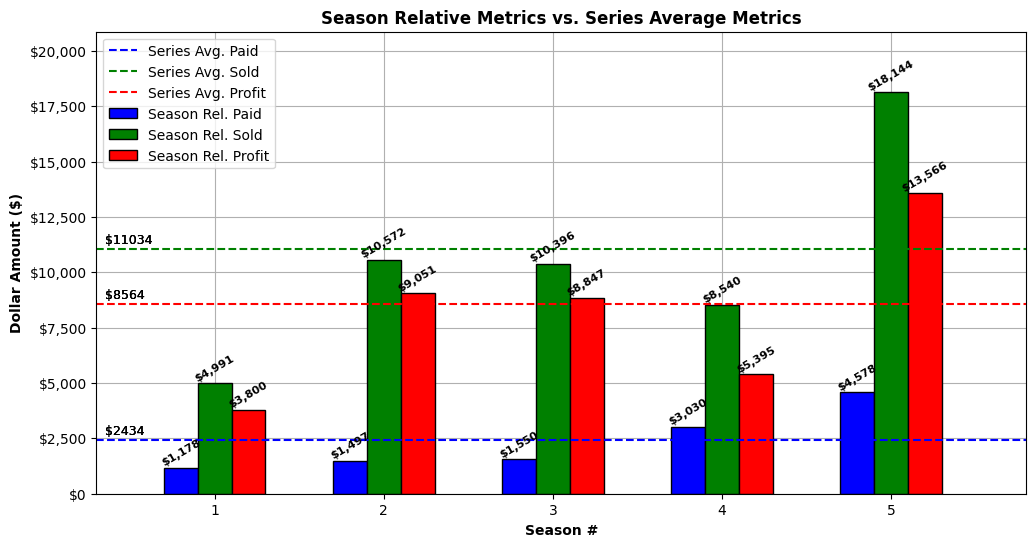

In [62]:
plot_relative_data_vs_series_averages(df_relative_seasons)

In [63]:
# explain it here

### 1.5.6. Cumulative Plot By Season

In [64]:
def plot_cumulative_shaded_line_by_season(df):
    """
    Insert a dataframe with total paid, sold profit by season dataframe with the list of metrics you want to plot.
    ** Do not change the order of metrics from paid, sold, profit in the list.
    """
    # Create a figure
    plt.figure(figsize=(12, 6))
    
    # Prevent the function from modifying the external dataframe
    df2 = df.copy()
    
    # Hard-coding the required metrics.
    list_of_input_metrics = ['total_paid_$','total_sold_$','total_profit_$']
    
    # Define colors and output metrics
    colors = ['b', 'g', 'r']
    output_metrics = ['cum_total_paid_$', 'cum_total_sold_$', 'cum_total_profit_$']
    
    # Calculate cumulative metrics and add them to the dataframe df.
    for i, metric in enumerate(list_of_input_metrics):
        df2[output_metrics[i]] = df2[metric].cumsum()
    
    # Plot cumulative metric
    for i, metric in enumerate(output_metrics):
        ax = sns.lineplot(data=df2, x='season_num', y=metric, color=colors[i], label=(metric.replace('cum_','')).capitalize(), marker="o")
        ax.fill_between(df2['season_num'], 0, df2[metric], alpha=0.3, color=colors[i])
        
        # Annotate cumsum() values at each season with $ values
        for j, value in enumerate(df2[metric]):
            if j == 0:  # Check if it's season 1
                if metric == output_metrics[0]: # paid
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='top', fontsize=10)
                elif metric == output_metrics[1]: # sold
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10)
                else:  # cumulative_profit
                    plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='center', fontsize=10)
            else:  # For other seasons, keep the default alignment
                plt.text(df2['season_num'][j], value, f'${int(value):,}', ha='right', va='bottom', fontsize=10)            
     
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    # ax.spines[['left', 'right', 'top']].set_visible(False)     # Remove the top and right axis
    plt.title('Auction Hunters: Cumulative Metrics by Season', weight="bold", fontsize=14)
    plt.xlabel('Season', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xlim(0.65, 5.35) # make space on the left and right edges for annotations
    plt.xticks(range(1, 6), fontsize=10)
    plt.grid(True)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

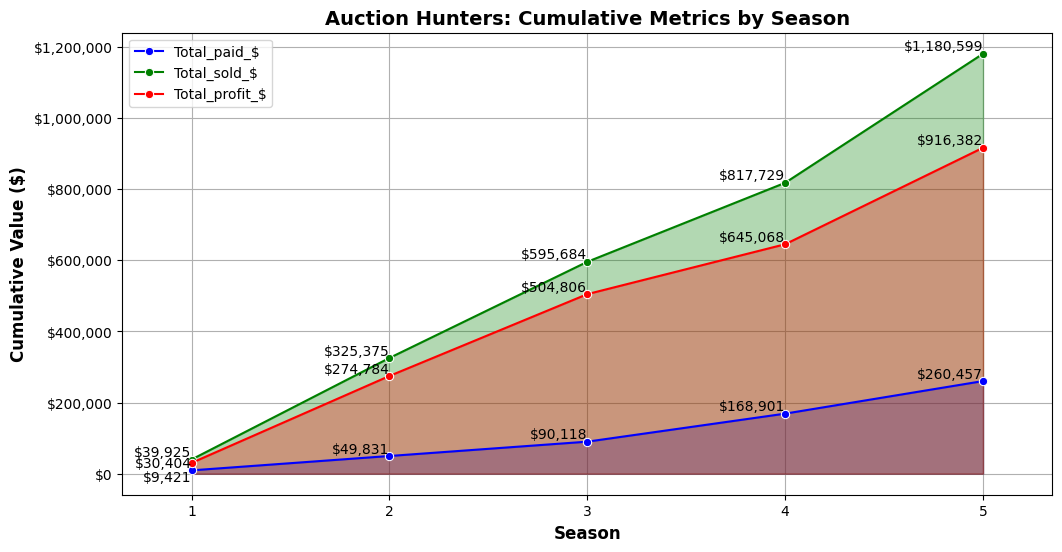

In [65]:
plot_cumulative_shaded_line_by_season(df_relative_seasons)

### 1.5.7. Cumulative Plot By Episodes

In [66]:
def plot_cumulative_shaded_line_by_episode(df):
    """
    Insert a dataframe with columns: total paid, sold profit by episode.
    This function will plot cumulative metrics for each episode without annotations.
    """
    # Create a figure
    plt.figure(figsize=(12, 6))

    # Prevent the function from modifying the external dataframe
    df2 = df.copy()

    # Define the list of input metrics
    list_of_input_metrics = ['paid_$', 'sold_$', 'profit_$']

    # Define colors and output metrics
    colors = ['b', 'g', 'r']
    output_metrics = ['cum_total_paid_$', 'cum_total_sold_$', 'cum_total_profit_$']

    # Calculate cumulative metrics and add them to the dataframe df.
    for i, metric in enumerate(list_of_input_metrics):
        df2[output_metrics[i]] = df2[metric].cumsum()

    # Plot cumulative metric by episode index
    for i, metric in enumerate(output_metrics):
        ax = sns.lineplot(data=df2, x=df2.index, y=metric, color=colors[i], label=(metric.replace('cum_', '')).capitalize())
        ax.fill_between(df2.index, 0, df2[metric], alpha=0.3, color=colors[i])

    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_axisbelow(True)
    plt.title('Auction Hunters: Cumulative Metrics by Episode', weight="bold", fontsize=14)
    plt.xlabel('Episode by Index', fontsize=12, weight="bold")
    plt.ylabel('Cumulative Value ($)', fontsize=12, weight="bold")
    plt.xticks(fontsize=10)
    ax.text(36, 1025000, "Note:\nThe bold numbers above the\nx-axis mark the beginning\nof each season.", size=9, color='red') # 0 is the index, so it means season 1.
    plt.grid(which='both', axis='y')
    plt.legend(loc='upper left')
    
    # Annotate the season starts based on unique_ep_ID
    for unique_ep_ID in [101, 201, 301, 401, 501]:
        episode_index = df2.index[df2['unique_ep_ID'] == unique_ep_ID]
        if not episode_index.empty:
            plt.annotate(f'{unique_ep_ID}', (episode_index[0], 0), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, weight="bold")
            plt.axvline(x=episode_index[0], color='gray', linestyle='--', ymin=0.05)

    plt.show()


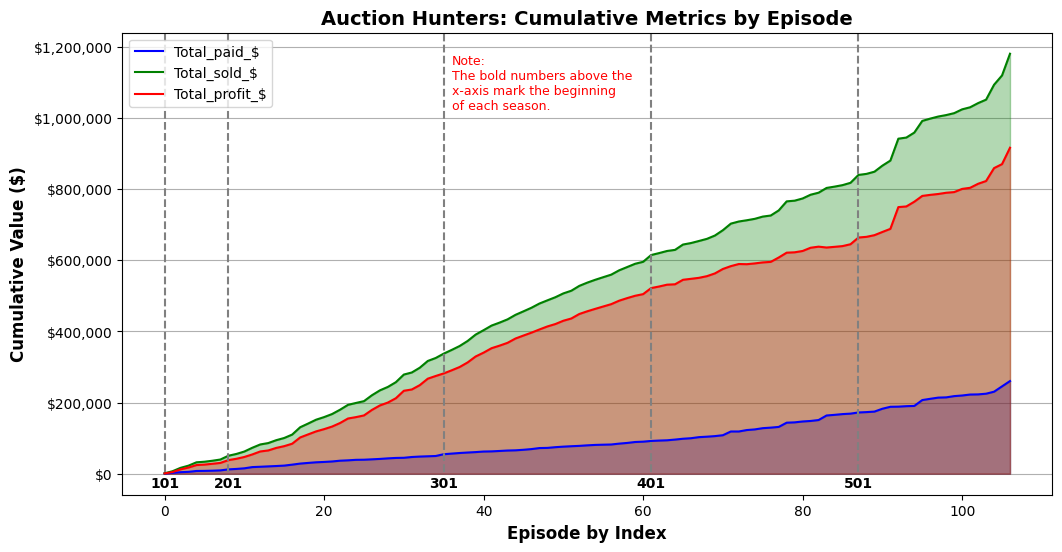

In [67]:
plot_cumulative_shaded_line_by_episode(df) 

## 1.6. What is the rank of best performing seasons using the relative scale (i.e. relative to it's episode count)?

### 1.6.1. In which season was the most money **paid** for a unit on an episode on average?

In [68]:
df_relative_seasons.sort_values('relative_paid_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,4,78783,222045,140262,26,3030.12,8540.19,5394.69
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,2,40410,285450,244380,27,1496.67,10572.22,9051.11
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


### 1.6.2. In which season was the most money **made from selling** a unit's contents per episode on average?

In [69]:
df_relative_seasons.sort_values('relative_sold_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


### 1.6.3. In which season was the most money **profited** from selling a unit's contents on an episode on average?

In [70]:
df_relative_seasons.sort_values('relative_profit_$', ascending=False).reset_index(drop=True)

,season_num,total_paid_$,total_sold_$,total_profit_$,episode_count,relative_paid_$,relative_sold_$,relative_profit_$
0,5,91556,362870,271314,20,4577.80,18143.50,13565.70
1,2,40410,285450,244380,27,1496.67,10572.22,9051.11
2,3,40287,270309,230022,26,1549.50,10396.50,8847.00
3,4,78783,222045,140262,26,3030.12,8540.19,5394.69
4,1,9421,39925,30404,8,1177.62,4990.62,3800.50


## 👌👌 If there is any way to aggregate this and provide a score, I am all ears.

# 2. Location Analysis

## 2.1. How many times did Allen and Ton visit each state per season? In Total?

In [ ]:
# before running this code, check if you already have the data!

In [ ]:
def get_state_code_location_to_df(df, location_col_name):
    """
    Pass in a dataframe with a location column name.
    Function will return the dataframe with a state_name and state_code column.
    """

    # Initialize an empty list to store state codes
    state_names = []
    state_codes = []
    count = 1
    length_df = len(df)

    for location in df[location_col_name]:
        # Send a GET request to Nominatim API
        url = f"https://nominatim.openstreetmap.org/search?q={location}&format=json&addressdetails=1"
        response = requests.get(url)
        data = response.json()
        

        # Extract the state code from the response
        if len(data) > 0:
            # We only want to take the first result (0th index), assuming it is the most relevant/accurate.
            # Otherwise, we can scan the data response for a dictionary key 'country': 'United States'
            result = data[0] 
            print(f"===== {count}/{length_df} =================================================================")
            try:
                state_name = result["address"]["state"]
                print(f"🔎 Checking `{location}` 👉 {state_name} ✔️")
            except (AttributeError, TypeError, KeyError):
                print(f"⚠️ Cannot get state name for `{location}`.")
                state_name = ""

            try:
                state_code = result["address"]["ISO3166-2-lvl4"].strip("US-")
                print(f"🔎 Checking `{location}` 👉 {state_code} ✔️")
            except (AttributeError, TypeError, KeyError):
                print(f"⚠️ Cannot get state code for `{location}`.")                
                state_code = ""
        else:
            print(f"⚠️ No data in response for `{location}`.") 

        state_names.append(state_name)
        state_codes.append(state_code)
        time.sleep(random.randint(5, 10))
        count += 1
        print("")
    
    print("🏁 Finished!")       
    df_with_loc = df.copy()

    # Add the state codes as a new column in the DataFrame
    df_with_loc['state_name'] = state_names
    df_with_loc['state_code'] = state_codes

    return df_with_loc


In [ ]:
tester_df = df.copy()
tester_df.head(2)

In [ ]:
location_data_cols = ['unique_ep_ID', 'location', 'state_name',	'state_code']
location_data_df = location_tester_df.loc[:, location_data_cols]                      

In [ ]:
location_data_df

### Save location data as a pickle

In [ ]:
if os.path.isfile(LOCATION_STATE_CODE_PICKLE):
    print(f"⚠️ '{LOCATION_STATE_CODE_PICKLE}' already exists. Skipping save operation. Handle existing data, then try again.")
else:
    with open(LOCATION_STATE_CODE_PICKLE, 'wb') as file:
        pickle.dump(location_data_df, file)
    print(f"✔️ '{LOCATION_STATE_CODE_PICKLE}' saved successfully!")

In [ ]:
location_data = location_tester_df.loc[:, 'state_code'].value_counts()
location_data

In [ ]:
import plotly.express as px

# fig = px.choropleth(locations=location_data.index, locationmode="USA-states", color=location_data.values, scope="usa")
fig = px.scatter_geo(locations=location_data.index, locationmode="USA-states", color=location_data.values, scope="usa")

fig = px.scatter_geo(location_data, 
                     locations=location_data.index, 
                     color=location_data.values,
                     hover_name='state_code', 
                     size=location_data.values,
                     locationmode="USA-states",
                     width=1000,
                     height=600,
                     projection="natural earth")

# fig.update_layout(
#     # geo_scope="usa",
#     width=500,  # Set the width of the figure
#     height=500  # Set the height of the figure
# )

fig.show()

In [ ]:

# Sample data (replace this with your data)
data = [
    {'season_num': 1, 'state_code': 'CA', 'visits': 10},
    {'season_num': 1, 'state_code': 'TX', 'visits': 8},
    {'season_num': 2, 'state_code': 'NY', 'visits': 12},
    # Add more data for other seasons and states
]

# Create a DataFrame from your data
df = pd.DataFrame(data)

# Create an interactive bubble map with Plotly
fig = px.scatter_geo(
    df,
    locations="state_code",
    locationmode="USA-states",
    color="season_num",
    size="visits",
    hover_name="state_code",
    scope="usa",
    title="States Visited by Season",
    height=600,
    width=1000
)

fig.update_geos(projection_type="albers usa")
fig.update_layout(geo_scope="usa")

fig.show()


## Load Pickle Data

In [ ]:
if os.path.isfile(LOCATION_STATE_CODE_PICKLE):
    with open(LOCATION_STATE_CODE_PICKLE, 'rb') as file:
        location_state_code_df = pickle.load(file)
else:
    # ask to run the api calls or abort
    # if run, assign variable name location_state_code_df and continue. 